This notebook how we transformed ANN 3 from keras into pytorch 

In [57]:
import tensorflow as tf
from cbrain import *
import torch as to
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda,Dropout
from cbrain.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler


import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import xarray as xr

import tensorflow.keras as ke


from cbrain.imports import *

from cbrain.utils import *

from cbrain.cam_constants import *

from cbrain.data_generator import DataGenerator
import pandas as ps

In [58]:
#define some hyperparameters  

original_dim_input=109  # CBRAIN input node size

original_dim_output=int(112) # CBRAIN output node size 


input_shape = (original_dim_input,)
out_shape=(original_dim_output,)
intermediate_dim = 422

batch_size= 8833





In [59]:
#load keras model
ANN_3=ke.models.load_model('real_geography/ANNs/ANNs_lin/ANN_3/ANN_3_CRM_lin_model.h5')
ANN_3.summary()
ANN_3_weights=ANN_3.get_weights()

batch_size= 8833


Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 109)]             0         
                                                                 
 dense (Dense)               (None, 422)               46420     
                                                                 
 dense_1 (Dense)             (None, 422)               178506    
                                                                 
 dense_2 (Dense)             (None, 422)               178506    
                                                                 
 dense_3 (Dense)             (None, 422)               178506    
                                                                 
 dense_4 (Dense)             (None, 422)               178506    
                                                                 
 dense_5 (Dense)             (None, 422)               178506  

load pytorch 

In [34]:
import torch.nn as nn
import torch.nn.functional as F

In [60]:
# construct ANN 3
class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.X_1=nn.Linear(109,422)
        self.X_2=nn.Linear(422,422)
        self.X_3=nn.Linear(422,422)
        self.X_4=nn.Linear(422,422)
        self.X_5=nn.Linear(422,422)
        self.X_6=nn.Linear(422,422)
        self.X_7=nn.Linear(422,422)
        self.X_8=nn.Linear(422,422)
        self.X_9=nn.Linear(422,112)
        self.X_10=nn.Linear(112,112)

    def forward(self,x):
        x=F.elu_(self.X_1(x))
        x=F.elu_(self.X_2(x))
        x=F.elu_(self.X_3(x))
        x=F.elu_(self.X_4(x))
        x=F.elu_(self.X_5(x))
        x=F.elu_(self.X_6(x))
        x=F.elu_(self.X_7(x))
        x=F.elu_(self.X_8(x))
        x=F.elu_(self.X_9(x))
        x=self.X_10(x)

        
        return x
    
    
        



        


In [61]:
# initialize ANN3 in pytorch 
ANN_3_torch=ANN()
print(ANN_3_torch)

ANN(
  (X_1): Linear(in_features=109, out_features=422, bias=True)
  (X_2): Linear(in_features=422, out_features=422, bias=True)
  (X_3): Linear(in_features=422, out_features=422, bias=True)
  (X_4): Linear(in_features=422, out_features=422, bias=True)
  (X_5): Linear(in_features=422, out_features=422, bias=True)
  (X_6): Linear(in_features=422, out_features=422, bias=True)
  (X_7): Linear(in_features=422, out_features=422, bias=True)
  (X_8): Linear(in_features=422, out_features=422, bias=True)
  (X_9): Linear(in_features=422, out_features=112, bias=True)
  (X_10): Linear(in_features=112, out_features=112, bias=True)
)


load weights and biases into pytorch model 

In [62]:
ANN_3_torch.X_1.weight.data=to.from_numpy(np.transpose(ANN_3_weights[0]))
ANN_3_torch.X_1.bias.data=to.from_numpy(np.transpose(ANN_3_weights[1]))
ANN_3_torch.X_2.weight.data=to.from_numpy(np.transpose(ANN_3_weights[2]))
ANN_3_torch.X_2.bias.data=to.from_numpy(np.transpose(ANN_3_weights[3]))
ANN_3_torch.X_3.weight.data=to.from_numpy(np.transpose(ANN_3_weights[4]))
ANN_3_torch.X_3.bias.data=to.from_numpy(np.transpose(ANN_3_weights[5]))
ANN_3_torch.X_4.weight.data=to.from_numpy(np.transpose(ANN_3_weights[6]))
ANN_3_torch.X_4.bias.data=to.from_numpy(np.transpose(ANN_3_weights[7]))
ANN_3_torch.X_5.weight.data=to.from_numpy(np.transpose(ANN_3_weights[8]))
ANN_3_torch.X_5.bias.data=to.from_numpy(np.transpose(ANN_3_weights[9]))
ANN_3_torch.X_6.weight.data=to.from_numpy(np.transpose(ANN_3_weights[10]))
ANN_3_torch.X_6.bias.data=to.from_numpy(np.transpose(ANN_3_weights[11]))
ANN_3_torch.X_7.weight.data=to.from_numpy(np.transpose(ANN_3_weights[12]))
ANN_3_torch.X_7.bias.data=to.from_numpy(np.transpose(ANN_3_weights[13]))
ANN_3_torch.X_8.weight.data=to.from_numpy(np.transpose(ANN_3_weights[14]))
ANN_3_torch.X_8.bias.data=to.from_numpy(np.transpose(ANN_3_weights[15]))
ANN_3_torch.X_9.weight.data=to.from_numpy(np.transpose(ANN_3_weights[16]))
ANN_3_torch.X_9.bias.data=to.from_numpy(np.transpose(ANN_3_weights[17]))
ANN_3_torch.X_10.weight.data=to.from_numpy(np.transpose(ANN_3_weights[18]))
ANN_3_torch.X_10.bias.data=to.from_numpy(np.transpose(ANN_3_weights[19]))


In [63]:
# define input and output variables 
in_vars = ['QBP', 'TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX','PRECTt-dt','CLDLIQBP','CLDICEBP']
out_vars = ['QBCTEND','TBCTEND','CLDLIQBCTEND','CLDICEBCTEND','PREC_CRM_SNOW','PREC_CRM',
            'NN2L_FLWDS','NN2L_DOWN_SW','NN2L_SOLL','NN2L_SOLLD','NN2L_SOLS','NN2L_SOLSD']

#loading the output normalization scalars for SP variables ( stds over 2 months of SP simulation)

scale_array=ps.read_csv('nn_config/scale_dicts/real_geography_SP_vars_updt.csv')


QBC_std_surf=scale_array.QBCTEND_std.values[-1]

TBC_std=scale_array.TBCTEND_std.values[-1]
CLDLIQBCTEND_std=scale_array.CLDLIQBCTEND_std.values[-1]
CLDICEBCTEND_std=scale_array.CLDICEBCTEND_std.values[-1]


PREC_CRM_SNOW_std=scale_array.PRECT_CRM_SNOW_std.values
PREC_CRM_std=scale_array.PRECT_CRM_std.values

NN2L_FLWDS_std=scale_array.NN2L_FLWDS_std.values
NN2L_DOWN_SW_std=scale_array.NN2L_DOWN_SW_std.values
NN2L_SOLL_std=scale_array.NN2L_SOLL_std.values
NN2L_SOLLD_std=scale_array.NN2L_SOLLD_std.values
NN2L_SOLS_std=scale_array.NN2L_SOLS_mean_std.values
NN2L_SOLSD_std=scale_array.NN2L_SOLSD_mean_std.values




# defining the scaling dict for the ANN training 

scale_dict_II = {
    'QBCTEND': 1/QBC_std_surf, 
    'TBCTEND': 1/TBC_std, 
    'CLDICEBCTEND': 1/CLDICEBCTEND_std, 
    'CLDLIQBCTEND': 1/CLDLIQBCTEND_std, 
    'NN2L_FLWDS':1/NN2L_FLWDS_std,
    'NN2L_DOWN_SW':1/NN2L_DOWN_SW_std,
    'NN2L_SOLL':1/NN2L_SOLL_std,
    'NN2L_SOLLD':1/NN2L_SOLLD_std,
    'NN2L_SOLS':1/NN2L_SOLS_std,
    'NN2L_SOLSD':1/NN2L_SOLSD_std,    
    'PREC_CRM': 1/PREC_CRM_std,
    'PREC_CRM_SNOW': 1/PREC_CRM_SNOW_std
}




# load vertical coords in pressure levels 


from cbrain.data_generator import DataGenerator

test_xr=xr.open_dataset('/work/bd1179/from_Mistral/bd1179/b381624/CESM2_NN2_pelayout01_ens_07.cam.h1.2013-01-01-00000.nc')
hybi=test_xr.hybi
hyai=test_xr.hyai

PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
dP = P[1:]-P[:-1];


# load test data set 

val_gen_II = DataGenerator(
    data_fn = '../SPCESM_data/2015_test_7_consec_days_mem.nc',
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = '../SPCESM_data/2013_norm_7_consec_days_mem.nc',
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict_II,
    batch_size=int(96*144),
    shuffle=True
)

In [64]:
from cbrain.save_weights import save_norm

In [40]:
# predict with keras and pytorch 

In [65]:
pred_keras= ANN_3.predict(val_gen_II[300][0])

432/432 [==============================] - 1s 1ms/step


In [66]:
print(pred_keras.shape)
pred_keras

(13824, 112)


array([[-6.31098374e-09,  9.33869160e-09,  7.54789653e-09, ...,
         2.70258725e-01,  1.89627147e+00,  7.98369765e-01],
       [-6.52289600e-09,  9.64610081e-09,  7.80164555e-09, ...,
         2.71284044e-01,  1.89574134e+00,  7.98972130e-01],
       [-6.52198651e-09,  9.64791980e-09,  7.79982656e-09, ...,
         2.71259874e-01,  1.89575601e+00,  7.98957527e-01],
       ...,
       [-4.02496880e-08,  5.95955498e-08,  4.81513780e-08, ...,
         5.71586564e-03, -1.12518985e-02, -8.78359750e-03],
       [-4.02305886e-08,  5.95664460e-08,  4.81277311e-08, ...,
         5.72195649e-03, -1.12530179e-02, -8.78004730e-03],
       [-4.04752427e-08,  5.99302439e-08,  4.84205884e-08, ...,
         5.69643825e-03, -1.12296157e-02, -8.79828632e-03]], dtype=float32)

In [67]:
pred_pytorch=ANN_3_torch(to.from_numpy(val_gen_II[300][0]))

In [68]:
pred_pytorch

tensor([[-6.3110e-09,  9.3369e-09,  7.5470e-09,  ...,  2.7026e-01,
          1.8963e+00,  7.9837e-01],
        [-6.5220e-09,  9.6461e-09,  7.8016e-09,  ...,  2.7128e-01,
          1.8957e+00,  7.9897e-01],
        [-6.5220e-09,  9.6479e-09,  7.7998e-09,  ...,  2.7126e-01,
          1.8958e+00,  7.9896e-01],
        ...,
        [-4.0250e-08,  5.9596e-08,  4.8151e-08,  ...,  5.7160e-03,
         -1.1252e-02, -8.7835e-03],
        [-4.0231e-08,  5.9572e-08,  4.8128e-08,  ...,  5.7220e-03,
         -1.1253e-02, -8.7800e-03],
        [-4.0477e-08,  5.9934e-08,  4.8423e-08,  ...,  5.6964e-03,
         -1.1230e-02, -8.7982e-03]], grad_fn=<AddmmBackward0>)

In [69]:
# perform forward step to get weights and biases 
module = to.jit.trace(ANN_3_torch.forward, to.from_numpy(val_gen_II[300][0]))

In [70]:
# the same but here the entire model is saved
mod = to.jit.trace(ANN_3_torch, to.from_numpy(val_gen_II[300][0]))

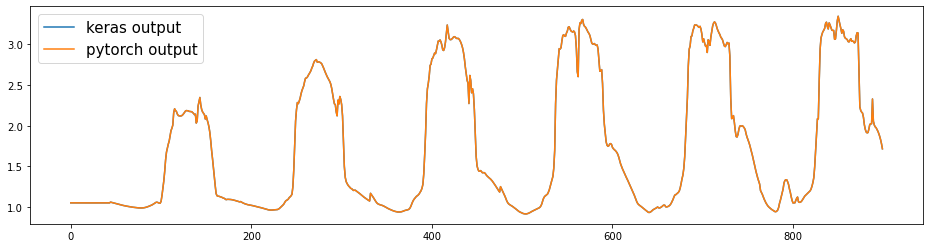

In [71]:
plt.figure(1,(16,4))
plt.plot(pred_keras[100:1000,106],label='keras output')
plt.plot(pred_pytorch.detach().numpy()[100:1000,106],label='pytorch output')
plt.legend(fontsize=15)

In [72]:
a=np.isclose(pred_keras,pred_pytorch.detach().numpy(),atol=2E-6)

In [73]:
a.shape

(13824, 112)

In [74]:
np.where(a==False)[0].size

96

In [75]:
np.where(a==True)[0].size

1548192

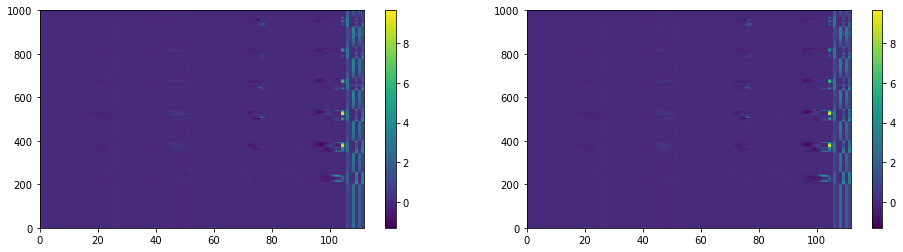

In [76]:
plt.figure(1,(16,4))
plt.subplot(1,2,1)
plt.pcolor(pred_keras[0:1000])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolor(pred_pytorch.detach().numpy()[0:1000])
plt.colorbar()

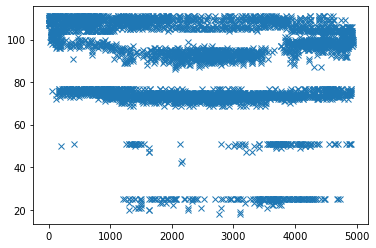

In [77]:
plt.plot(np.where(pred_keras-pred_pytorch.detach().numpy()>=1E-6)[1],'x')#np.max(pred_keras-pred_pytorch.detach().numpy()))

In [78]:
# save weights and biases of pytorch model 
to.save(ANN_3_torch,'real_geography/ANNs/ANN_3/ANN_3_CRM_lin.pt')

In [79]:
# save entire pytorch model 
to.jit.save(mod,'real_geography/ANNs/ANN_3/ANN_3_CRM_lin_jit.pt')